In [2]:
import numpy as np
import pandas as pd
import itertools
from __future__ import division
import geoplotlib as glp
from geoplotlib.utils import BoundingBox, DataAccessObject

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
filePath = 'datasets/NYPD_Motor_Vehicle_Collisions.csv'

collisions = pd.read_csv(filePath)
collisions = collisions[pd.notnull(collisions.BOROUGH)]
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/14/2016,3:27,QUEENS,11372,40.747734,-73.882999,"(40.7477341, -73.8829986)",ROOSEVELT AVENUE,83 STREET,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3405169,OTHER,NaN,NaN,NaN,NaN
3,03/14/2016,0:45,MANHATTAN,10035,40.808279,-73.938793,"(40.8082795, -73.9387929)",EAST 129 STREET,MADISON AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3405059,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
4,03/13/2016,23:00,BROOKLYN,11206,40.706653,-73.950406,"(40.7066527, -73.9504063)",UNION AVENUE,MONTROSE AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3405121,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
6,03/13/2016,9:48,BROOKLYN,11212,40.661997,-73.919593,"(40.661997, -73.9195931)",KINGS HIGHWAY,EAST 98 STREET,NaN,0,0,0,0,0,0,0,0,Passenger Distraction,Unspecified,NaN,NaN,NaN,3404744,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
9,03/13/2016,9:46,QUEENS,11106,40.756580,-73.929752,"(40.75658, -73.9297516)",36 AVENUE,31 STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3404995,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [4]:
collisions['CROSS STREET NAME'].value_counts()

3 AVENUE                  9076
BROADWAY                  8947
2 AVENUE                  8309
5 AVENUE                  6937
8 AVENUE                  6471
7 AVENUE                  6388
1 AVENUE                  5116
PARK AVENUE               4290
LEXINGTON AVENUE          4206
6 AVENUE                  4056
9 AVENUE                  3514
MADISON AVENUE            3477
AMSTERDAM AVENUE          2915
10 AVENUE                 2592
ATLANTIC AVENUE           2562
4 AVENUE                  2402
LINDEN BOULEVARD          2282
NORTHERN BOULEVARD        2232
JAMAICA AVENUE            2018
BEDFORD AVENUE            1947
11 AVENUE                 1939
NOSTRAND AVENUE           1936
QUEENS BOULEVARD          1717
FULTON STREET             1667
MYRTLE AVENUE             1628
COLUMBUS AVENUE           1501
HILLSIDE AVENUE           1459
LENOX AVENUE              1446
YORK AVENUE               1380
AVENUE OF THE AMERICAS    1346
                          ... 
UNCAS AVENUE                 1
GREENWOO

In [5]:
mask = ((collisions['CROSS STREET NAME'] == 'BUSHWICK AVENUE') & (collisions['ON STREET NAME'] == 'COOK STREET'))
#mask = ((collisions['CROSS STREET NAME'] == 'BUSHWICK AVENUE'))

bushwick = collisions[mask]
bushwick

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1756,03/10/2016,19:50,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3403113,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
34542,01/13/2016,9:16,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3370214,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
293764,10/31/2014,10:45,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Prescription Medication,Unspecified,NaN,NaN,NaN,2988824,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
320282,09/15/2014,11:20,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,1025079,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
430880,03/04/2014,10:35,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,198093,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [6]:
locationMask = (collisions.LOCATION == '(40.702713, -73.9373173)')

collisions[locationMask]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1756,03/10/2016,19:50,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3403113,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
34542,01/13/2016,9:16,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3370214,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
51117,12/15/2015,11:27,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,0,0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,3353634,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
112098,09/08/2015,14:00,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3292475,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
219952,03/11/2015,19:45,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3185087,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
278604,11/25/2014,18:48,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3125844,UNKNOWN,UNKNOWN,NaN,NaN,NaN
293764,10/31/2014,10:45,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Prescription Medication,Unspecified,NaN,NaN,NaN,2988824,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
299495,10/21/2014,18:40,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,0,0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2812044,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
320282,09/15/2014,11:20,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",COOK STREET,BUSHWICK AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,1025079,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
396155,05/07/2014,15:00,BROOKLYN,11206,40.702713,-73.937317,"(40.702713, -73.9373173)",BUSHWICK AVENUE,COOK STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,332149,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [8]:
locationsCounts = collisions.LOCATION.value_counts()
locationsCountsFrame  = locationsCounts.to_frame()
locationsCountsFrame
#locationsCountsFrame.count

,LOCATION
"(40.6960346, -73.9845292)",585
"(40.7606005, -73.9643142)",472
"(40.7572323, -73.9897922)",455
"(40.6757357, -73.8968533)",433
"(40.6585778, -73.8906229)",417
"(40.7203211, -73.9940403)",368
"(40.7334973, -73.8703694)",354
"(40.7602226, -73.967462)",353
"(40.7584292, -73.9926328)",350
"(40.7509908, -73.9906233)",347


In [9]:
locationsCountsFrame['LAT'] = locationsCountsFrame.index.str.split(',').str.get(0).str.replace('(', '')
locationsCountsFrame['LON'] = locationsCountsFrame.index.str.split(',').str.get(1).str.replace(')', '')

#locationsCountsFrame.index

In [10]:
#locationsCountsFrame

sums = collisions.groupby(['LOCATION'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()


In [11]:
result = locationsCountsFrame.combine_first(sums)
result

,LAT,LOCATION,LON,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
"(40.4989488, -74.2443651)",40.4989488,2,-74.2443651,0,0
"(40.4991346, -74.2434848)",40.4991346,1,-74.2434848,0,0
"(40.4994787, -74.2417278)",40.4994787,1,-74.2417278,1,0
"(40.499659, -74.2408224)",40.499659,1,-74.2408224,0,0
"(40.499842, -74.2399169)",40.499842,2,-74.2399169,0,0
"(40.5000251, -74.2390115)",40.5000251,3,-74.2390115,0,0
"(40.5002081, -74.2381024)",40.5002081,1,-74.2381024,0,0
"(40.5004173, -74.2364851)",40.5004173,1,-74.2364851,0,0
"(40.500737, -74.2488483)",40.500737,2,-74.2488483,0,0
"(40.5011072, -74.2413094)",40.5011072,1,-74.2413094,0,0


In [12]:
result.sort_values(by='LOCATION')

,LAT,LOCATION,LON,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
"(40.9128276, -73.9025057)",40.9128276,1,-73.9025057,0,0
"(40.6304344, -74.1240191)",40.6304344,1,-74.1240191,0,0
"(40.7392482, -73.7936939)",40.7392482,1,-73.7936939,0,0
"(40.7391146, -73.9969147)",40.7391146,1,-73.9969147,0,0
"(40.7391137, -73.7494134)",40.7391137,1,-73.7494134,0,0
"(40.7390375, -73.9735456)",40.7390375,1,-73.9735456,1,0
"(40.6304724, -74.0181216)",40.6304724,1,-74.0181216,0,0
"(40.6304821, -73.9981987)",40.6304821,1,-73.9981987,0,0
"(40.7390245, -73.860399)",40.7390245,1,-73.860399,0,0
"(40.7390135, -73.8937711)",40.7390135,1,-73.8937711,0,0


In [13]:
result.to_csv('datasets/collision_counts.csv', sep=',')

In [7]:
collisions['year'] = collisions.DATE.str.split('/').str.get(2)

top10Intersections = collisions.LOCATION.value_counts()[:10]


top10 = collisions[collisions.LOCATION.isin(top10Intersections.index)]

In [17]:
top10Intersections.to_frame()

,LOCATION
"(40.6960346, -73.9845292)",585
"(40.7606005, -73.9643142)",472
"(40.7572323, -73.9897922)",455
"(40.6757357, -73.8968533)",433
"(40.6585778, -73.8906229)",417
"(40.7203211, -73.9940403)",368
"(40.7334973, -73.8703694)",354
"(40.7602226, -73.967462)",353
"(40.7584292, -73.9926328)",350
"(40.7509908, -73.9906233)",347


In [22]:
def addStreetName(e):
    return top10[top10.LOCATION == e.name][['ON STREET NAME', 'CROSS STREET NAME']].iloc[0]
    
top10InDf = top10Intersections.to_frame()
    
    
top10InDf[['ON STREET NAME', 'CROSS STREET NAME']] = top10InDf.apply(addStreetName, axis=1)
top10InDf.rename(columns={'LOCATION': 'COLLISIONS'}, inplace=True)
top10InDf.index.name = "LOCATION"
top10InDf.to_csv('datasets/intersection_top_10.csv', sep=',')

In [15]:


#f = top10.groupby(['year','LOCATION']).sum()
#top10.plot(kind='bar', figsize=(8,8), fontsize=20, rot=45)
#f[['NUMBER OF PERSONS INJURED']].plot(kind='bar',figsize=(15,10), fontsize=20)

print len(top10.LOCATION)

series = {};

for location in top10.LOCATION:
    a_location = top10[top10.LOCATION == location]
    #print a_location.year
    index = []
    data = []
    key = a_location['ON STREET NAME'].iloc[0] + ' / ' + a_location['CROSS STREET NAME'].iloc[0]
    for year in range(2012, 2016):
        index.append(year)
        data.append(len(a_location[a_location.year == str(year)].index))
    series[key] = pd.Series(data, index=index);
    


4134


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000A62BC780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000A6ADE2B0>]], dtype=object)

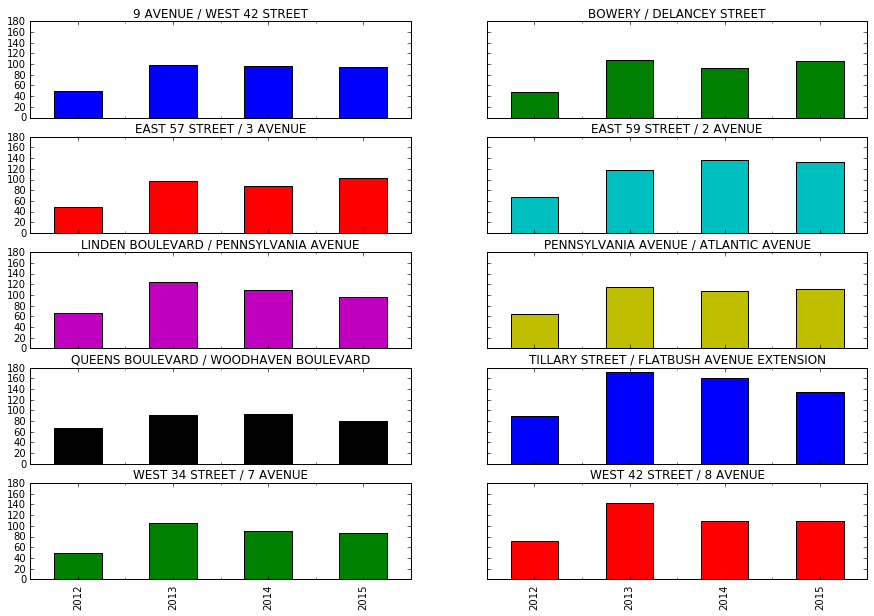

In [35]:
pd.DataFrame(series).plot(kind='bar',figsize=(15,10), subplots=True, layout=(5,2), legend=False, sharey=True)

In [20]:
lat = top10.LATITUDE.values
lon = top10.LONGITUDE.values

glp.dot({'lat': lat, 'lon': lon}, color="r")
glp.inline()


In [29]:
top10Injuries = collisions.groupby(['LOCATION'])['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False)[:10]

In [32]:
collisions.groupby(['LOCATION'])['NUMBER OF PERSONS KILLED'].sum().sort_values(ascending=False)[:11]



LOCATION
(40.6972045, -73.8133341)    5
(40.7792798, -73.9008742)    4
(40.7031587, -73.9658741)    3
(40.7421627, -73.8044317)    3
(40.6936625, -73.8521639)    3
(40.6420041, -73.8988296)    3
(40.7563818, -73.9643237)    3
(40.5976825, -73.9668499)    3
(40.7445094, -73.7660986)    3
(40.8387216, -73.9137706)    3
(40.7942333, -73.9469462)    3
Name: NUMBER OF PERSONS KILLED, dtype: int64